# Modelling photosynthesis
### Meeting 8 May 2018 with Dietzel Group @ Plant Cell Physiology - AK Büchel
by Anna Matuszyńska and Oliver Ebenhöh

Mathematical model of photosynthesis developed for a model organism *Arabidopsis thaliana*, using **MODELbase**, a Python based wrapper around the most useful commands that allow you to **create** and **analyse** dynamic mathematical models of biological systems. It has been developed at the [Insitute for Quantitative and Theoretical Biology](http://www.qtb.hhu.de/) at the Heinrich-Heine University Düsseldorf, Germany. 

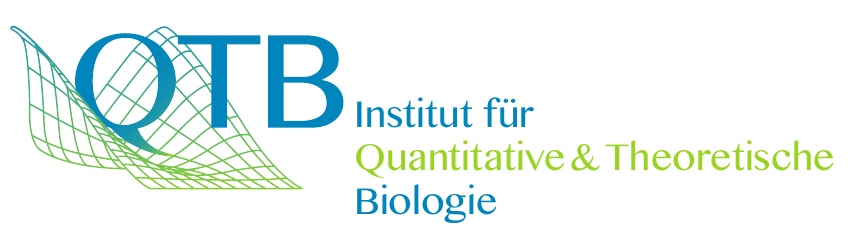

## Model compartments and included mechanisms
**Lumenal side of the thylakoid membrane**
- units: mmol/mol of Chl
- based on work by Ebenhöh *et al.*, 2014 and Matuszyńska *et al.*, 2016
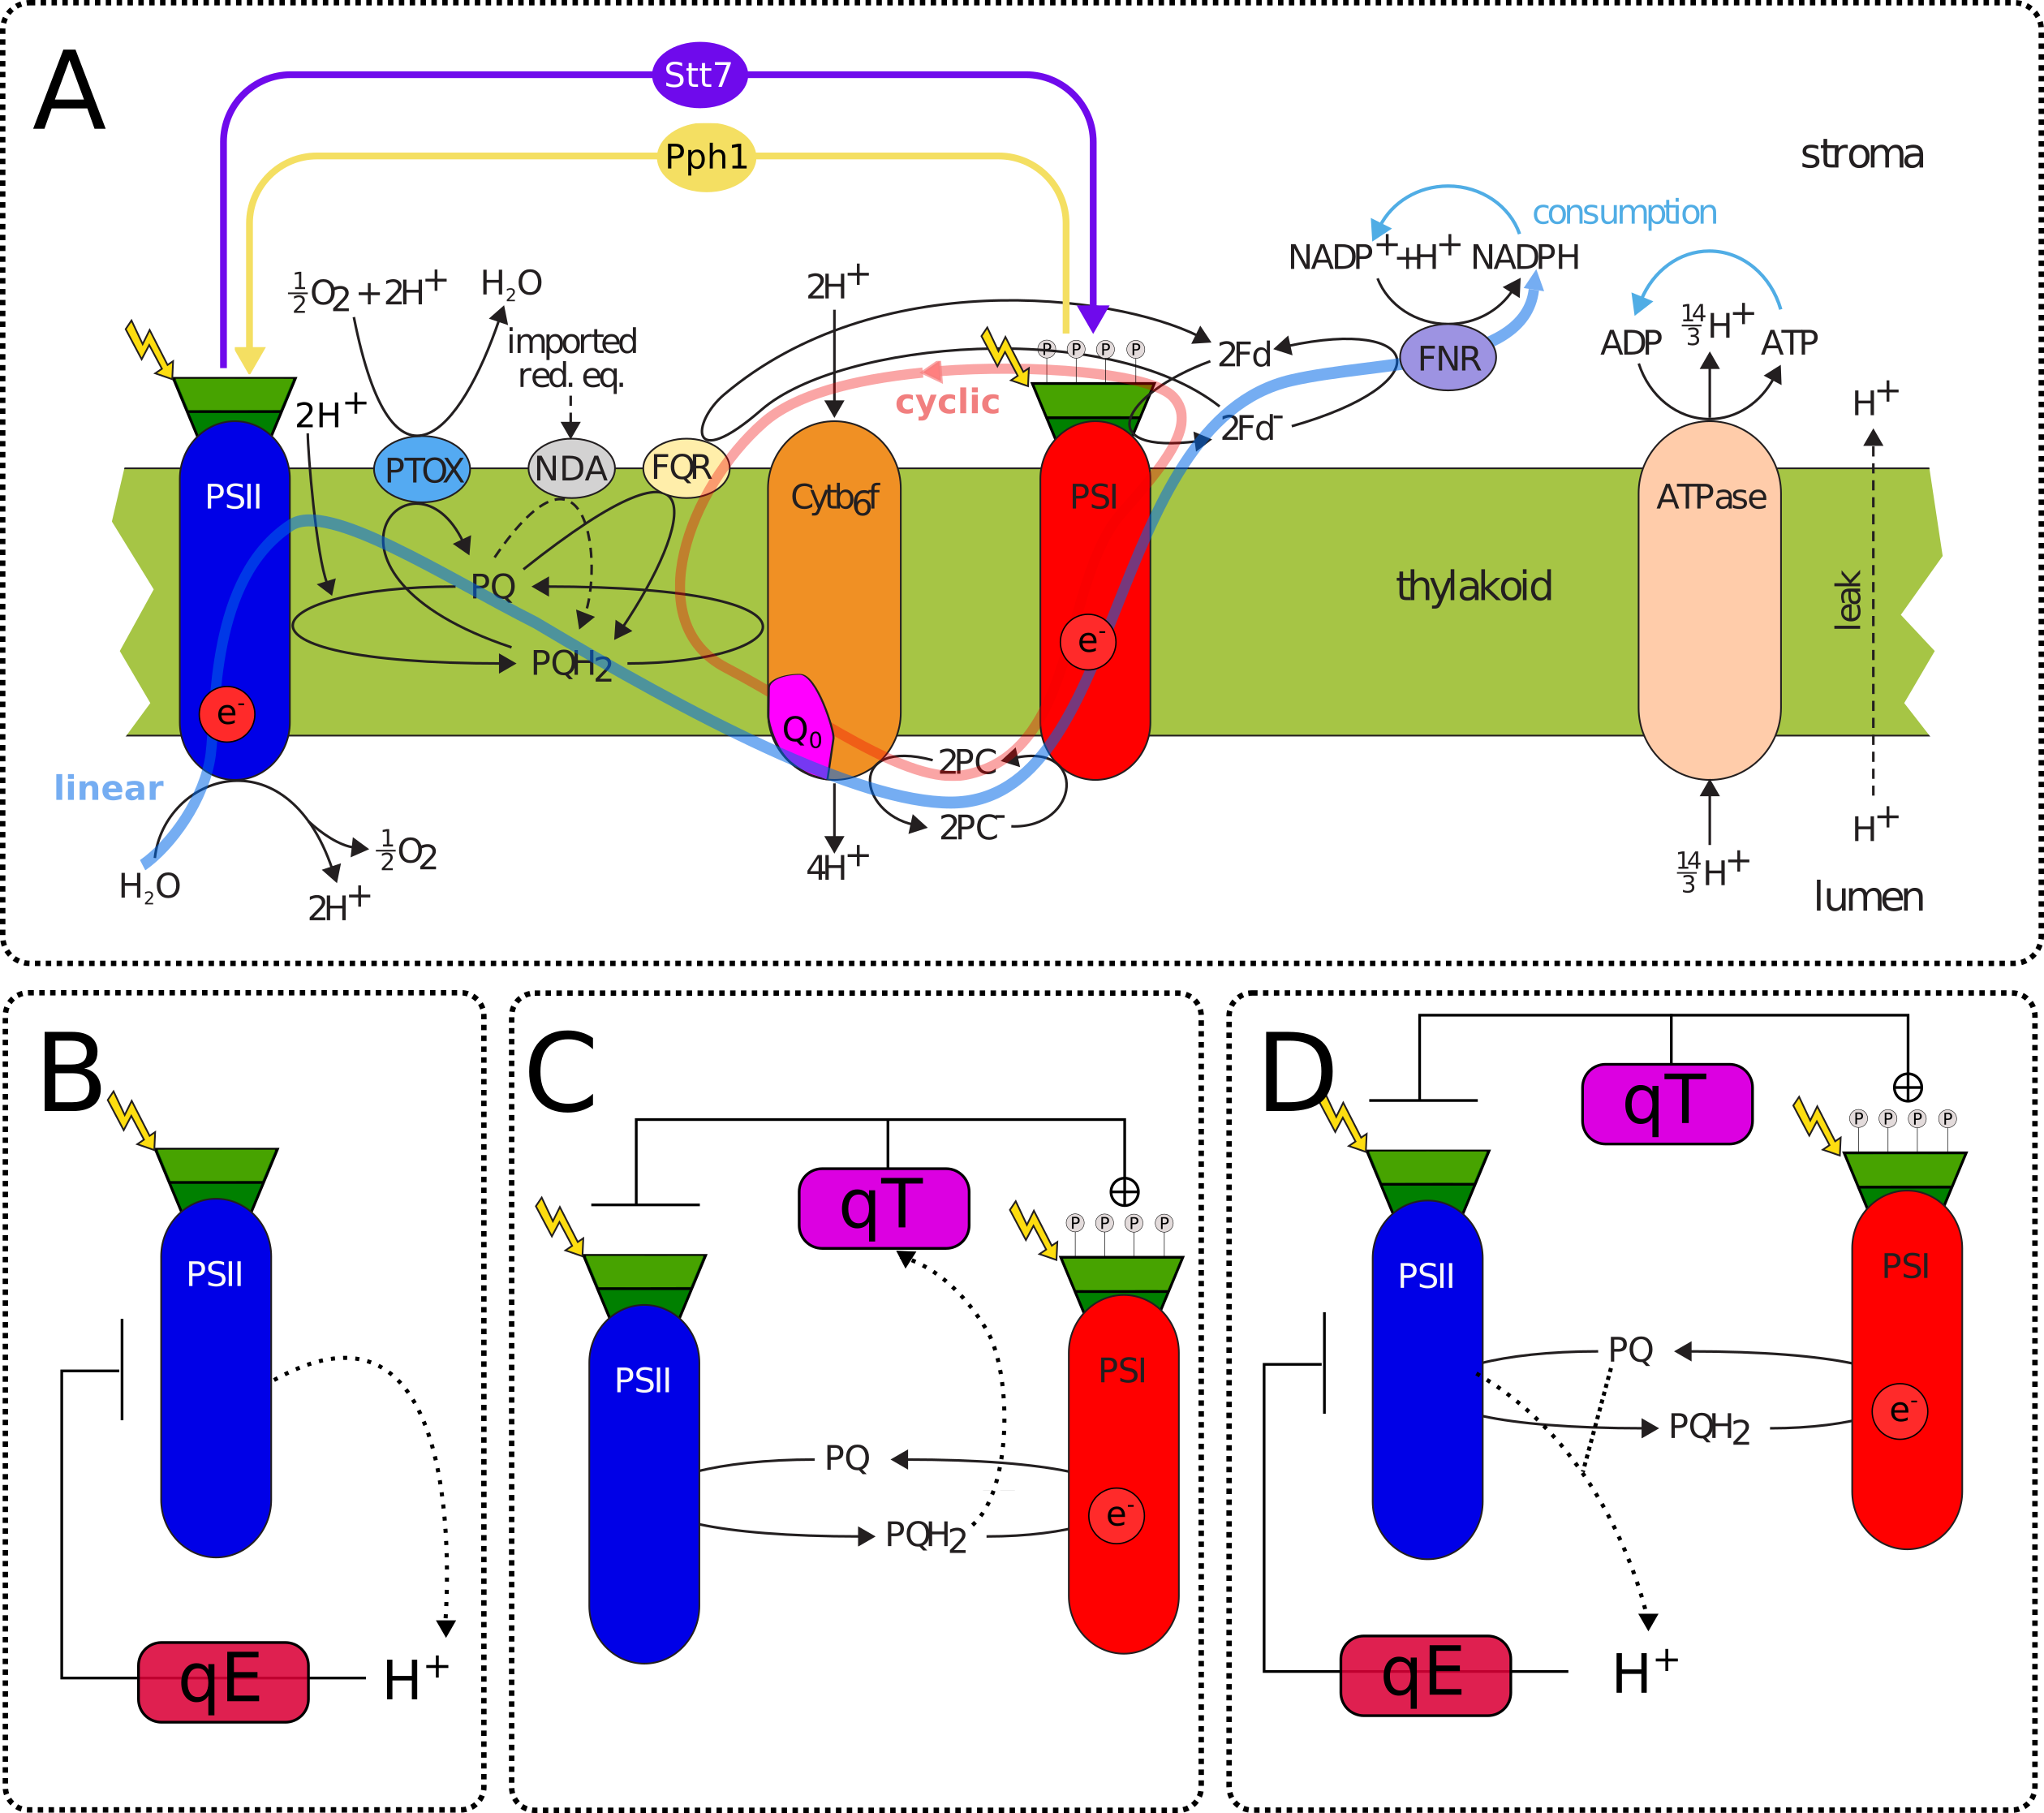
**Stromal side and the Calvin-Benson-Bassham cycle**
- units: mM
- based on work by Pettersson & Pettersson, *Eur. J. Biochem.* 1988, Poolman *et al.*, *J. Exp. Bot.*, 2000 and Saadat 2016 (bachelor project)
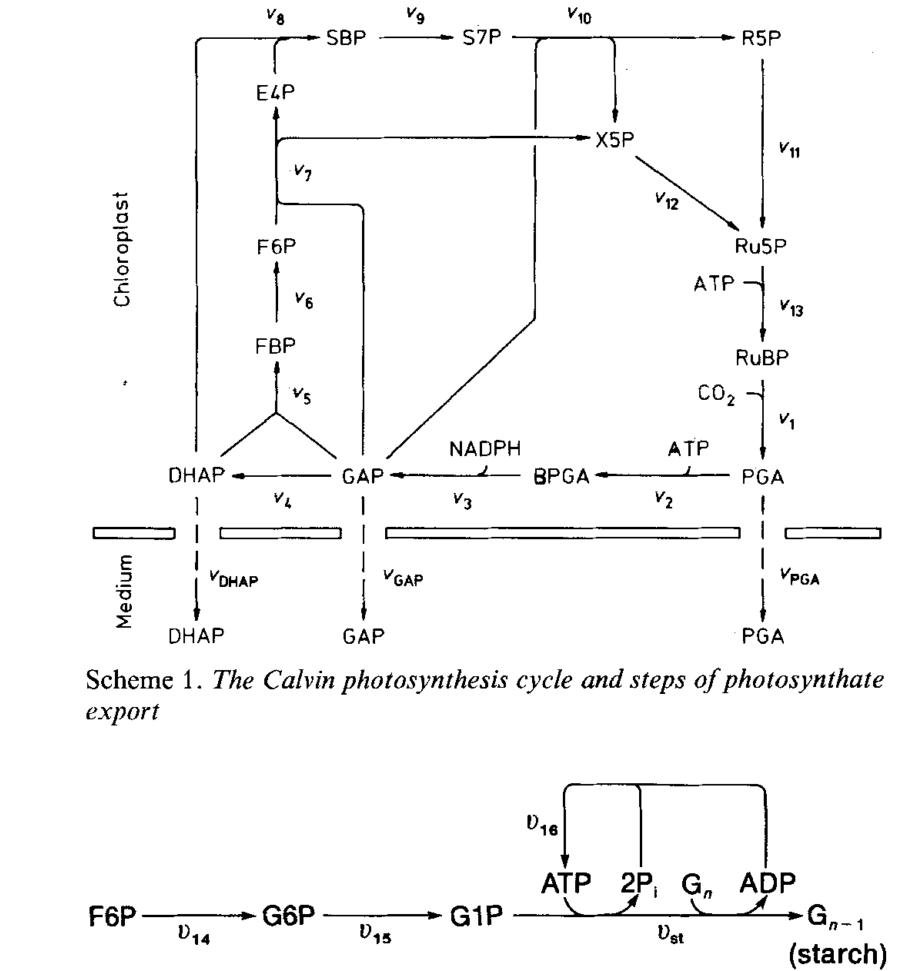

In [2]:
import sys
!{sys.executable} -m pip install modelbase;

  Using cached https://files.pythonhosted.org/packages/b7/b9/0c178b43ad32a54f874495b018438d6d3dd3a7208a83b7670f82c98f165b/modelbase-0.1.9.tar.gz
  Running setup.py bdist_wheel for modelbase ... done
  Stored in directory: /home/anna/.cache/pip/wheels/de/e0/a2/16c7f445ead2e4ce95aa23c2ee1bc3cde4bfa4c140d9df30fa
Successfully built modelbase


In [3]:
!{sys.executable} -m pip install seaborn;

In [4]:
# Import built-in libraries
import modelbase
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

MODELbase incorporates an easy construction method to define 'reactions'. Every model is defined by:
- model variables,
- model parameters,
- rate equations,
- stoichiometries.

With this information the system of differential equations is assembled **automatically**.

In [23]:
# Instantiate 3 modelling objects
import model
import parameters
import reactionrates

p = parameters.Parameters()
r = reactionrates.Reactions()
m = model.Merged2018()

In [24]:
# Pass initial values
init = {
        "PSII": p.PSIItot,
        "PQ":p.PQtot/2,
        "PC":p.PCtot/2,
        "Fd":p.Fdtot/2,
        "ATP":0.414993685612,
        "NADPH":0.281543418344,
        "H (lumen)":r.pHinv(7.2),
        "LHC":0.9,
        "PGA":0.599645270373,
        'BPGA':0.000907499521924,
        'GAP':0.011839616887,
        'DHAP':0.260471552645,
        'FBP':0.021895569623,
        'F6P':1.2456290719,
        'G6P':2.86494686535,
        'G1P':0.166166918189,
        'SBP':0.1120019621,
        'S7P':0.233467059202,
        'E4P':0.0330766864679,
        'X5P':0.0374527459593,
        'R5P':0.0627333486958,
        'RUBP':0.261466058509,
        'RU5P':0.0250933393445
}

y0 = np.array(list(init.values()))

In [25]:
# Check the rates for the initial experimental conditions
m.rates(y0);

In [26]:
# Instantiate finall modelling object on which experiments will be performed
s = modelbase.assimulate.Assimulate(m)

In [27]:
# Define experimental conditions:
# T: time and PFD: light intensity
s.model.par.PFD = 200
T = np.linspace(0, 1000, 5000)

In [28]:
# Run the simulation 
s.timeCourse(T, y0);

## Display the results graphically

In [33]:

def plot(t,y,init,groups):
    """
    Input:
        t: time array
        y: value array
        init: dictionary with initvalues
        groups: nested list with groups for each plot
    """
    legend = list(init.keys())
    nrows = int(np.ceil((len(groups))/2))
    fig, ax = plt.subplots(nrows,2, figsize=[12,3*nrows])
    ax = ax.ravel()
    for plot,g in enumerate(groups):
        for i in g:
            ax[plot].plot(t,y[:,legend.index(i)],label=i)
            ax[plot].set_xlabel('time [s]')
        if plot % 2 == 0:
            ax[plot].legend(bbox_to_anchor=[-0.15, 1], loc='upper right',borderaxespad = 0)
        else:
            ax[plot].legend(bbox_to_anchor=[1.15, 1], loc='upper left',borderaxespad = 0)
            ax[plot].yaxis.tick_right()
        ax[plot].legend().set_visible(True)
    plt.tight_layout()
    plt.show()

In [34]:
# Group the variables to display them in a visually accesible way
groups = [
    ["PSII"],
    ["LHC"],
    ["PQ", "PC", "Fd"],
    ["H (lumen)"],
    ['G6P', 'PGA', 'F6P', 'S7P'],
          ['RU5P', 'X5P', 'SBP', 'G1P'],
          ['ATP', 'DHAP', 'RUBP', 'R5P','NADPH'],
          ['BPGA', 'E4P', 'FBP', 'GAP']]

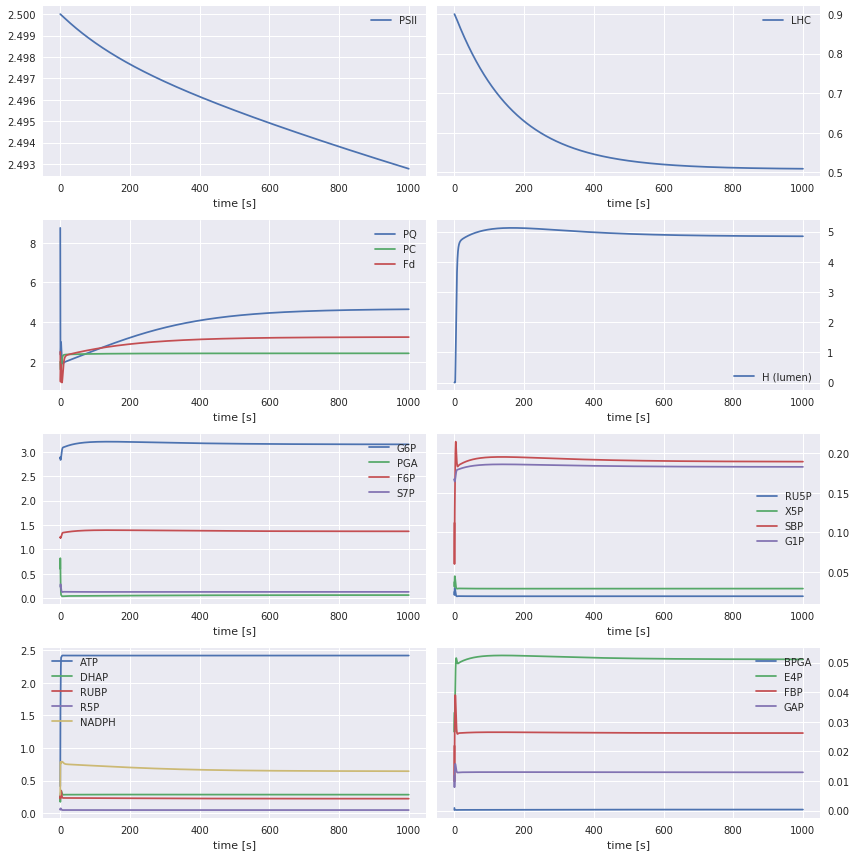

<Figure size 432x288 with 0 Axes>

In [35]:
# Display the results graphically
plot(T, s.getY(), init, groups)
plt.suptitle('Simulations for light intensity: '+str(s.model.par.PFD))
plt.show()

## Spectrum of possible analyses
#### 1. Plot the ratio between ATP and NADPH concentration over the time

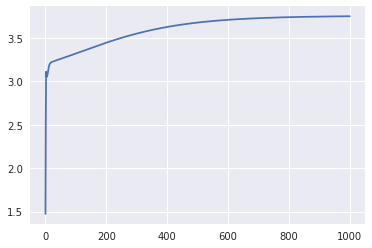

In [40]:
plt.plot(T, s.getVarByName('ATP')/s.getVarByName('NADPH') )

#### 2. How would this ratio change when the light intensity increases?

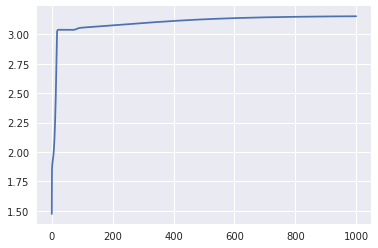

In [42]:
sh = modelbase.assimulate.Assimulate(m)
sh.model.par.PFD = 500
T = np.linspace(0, 1000, 5000)
sh.timeCourse(T, y0);
plt.plot(T, sh.getVarByName('ATP')/sh.getVarByName('NADPH') )